# PCA 在图像压缩中的示例


c:\Users\Dyson\.conda\envs\d2l\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dyson\.conda\envs\d2l\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


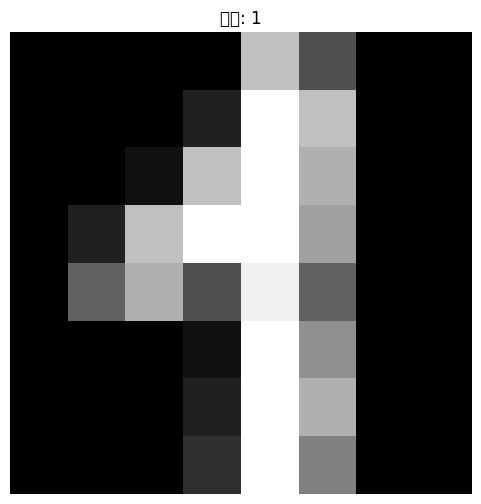

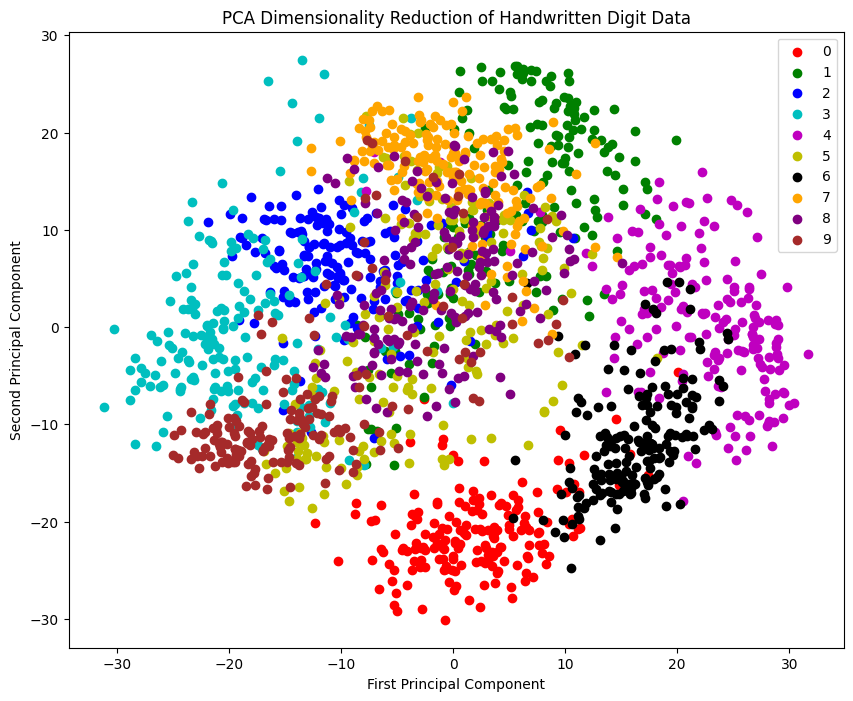

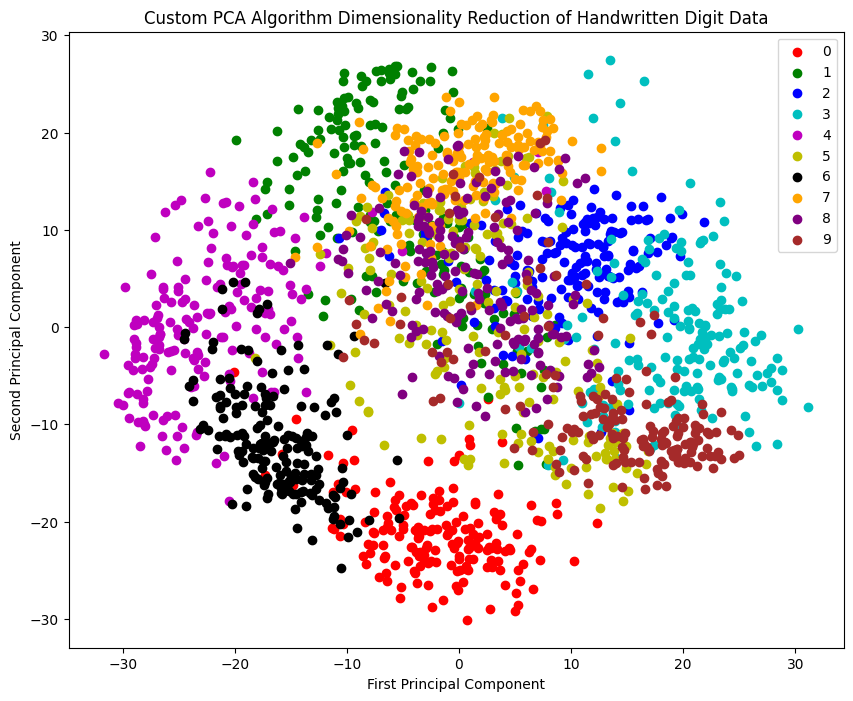

Key steps of PCA algorithm explained:
1. Data centering: Set the mean of each feature to 0 to eliminate bias between features.
2. Calculate covariance matrix: Reflects the correlation between features.
3. Calculate eigenvalues and eigenvectors: Eigenvalues represent the importance of principal components, eigenvectors represent the direction of principal components.
4. Select principal components: Choose the most important principal components based on the magnitude of eigenvalues.
5. Data projection: Project the original data onto the selected principal components to achieve dimensionality reduction.


In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# 加载手写数字数据集
digits = load_digits()
X = digits.data
y = digits.target

# 展示某个元素的图像
index = 42  # 选择要展示的元素索引

plt.figure(figsize=(6, 6))
plt.imshow(digits.images[index], cmap='gray')
plt.title(f'标签: {digits.target[index]}')
plt.axis('off')
plt.show()

# 创建PCA对象并拟合数据
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化降维结果
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i, c in zip(range(10), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=str(i))
plt.legend()
plt.title('PCA Dimensionality Reduction of Handwritten Digit Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


# PCA算法实现
def pca_algorithm(X, n_components):
    # 1. 数据中心化
    X_centered = X - np.mean(X, axis=0)
    
    # 2. 计算协方差矩阵
    cov_matrix = np.cov(X_centered.T)
    
    # 3. 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # 4. 选择前n_components个最大的特征值对应的特征向量
    idx = eigenvalues.argsort()[::-1]
    eigenvectors = eigenvectors[:, idx]
    principal_components = eigenvectors[:, :n_components]
    
    # 5. 将数据投影到主成分上
    X_pca = np.dot(X_centered, principal_components)
    
    return X_pca, principal_components

# 使用自定义PCA算法
X_custom_pca, principal_components = pca_algorithm(X, n_components=2)

# 可视化自定义PCA结果
plt.figure(figsize=(10, 8))
for i, c in zip(range(10), colors):
    plt.scatter(X_custom_pca[y == i, 0], X_custom_pca[y == i, 1], c=c, label=str(i))
plt.legend()
plt.title('Custom PCA Algorithm Dimensionality Reduction of Handwritten Digit Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Explain key steps
print("Key steps of PCA algorithm explained:")
print("1. Data centering: Set the mean of each feature to 0 to eliminate bias between features.")
print("2. Calculate covariance matrix: Reflects the correlation between features.")
print("3. Calculate eigenvalues and eigenvectors: Eigenvalues represent the importance of principal components, eigenvectors represent the direction of principal components.")
print("4. Select principal components: Choose the most important principal components based on the magnitude of eigenvalues.")
print("5. Data projection: Project the original data onto the selected principal components to achieve dimensionality reduction.")
